EDA (Exploratory Data Analysis) is the process of investigating and analyzing the data to summarize it's main characteristics and gain a deep understanding of what it represents. Usually, we use data visualization techniques to create plots or visuals which are easier to understand and also help us in spotting patterns within the data. In this blog post, we are going to explore how EDA can be automated so that we can reduce the manual effort and time needed to understand our data.

Currently, there are many libraries in python that allow us to automate our EDA process, but here we are going to use the following three:

- Sweetviz
- Pandas Profiling 
- AutoViz 

We will be using the [HR Analytics](https://www.kaggle.com/giripujar/hr-analytics) dataset from Kaggle to experiment with Auto-EDA and see how useful it really is. 

First things first, let's install our python libraries and download our data.

## Initial Setup

### Installing the libraries

First, we are going to install our python libraries. To see the install instructions of the libraries in detail, you can check out their Github repositories:
- [SweetViz](https://github.com/fbdesignpro/sweetviz)
- [Pandas Profiling](https://github.com/pandas-profiling/pandas-profiling)
- [AutoViz](https://github.com/AutoViML/AutoViz)


We are going to use the 'pip' command as usual to install the libraries.

In [1]:
#collapse-output
!pip install sweetviz autoviz 

     |████████████████████████████████| 15.1MB 308kB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


Pandas Profiling provides some specific instructions for installation so let's follow those.

In [2]:
#collapse-output
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 256kB 6.8MB/s 
     |████████████████████████████████| 645kB 9.4MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 1.1MB 16.3MB/s 
     |████████████████████████████████| 3.1MB 29.5MB/s 
     |████████████████████████████████| 10.1MB 32.7MB/s 
     |████████████████████████████████| 112kB 40.0MB/s 
     |████████████████████████████████| 122kB 38.3MB/s 
     |████████████████████████████████| 296kB 34.7MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=2889c06fcf32178bcfcd894aa597f8a6f0651e0e53d1d8a3051fb1deba3f03b4
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=a2c7b4e43b5c0b9fe7c51601923c17c3f39f88ec55bb08e7490cf4a73bd8fdd5
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85

### Downloading dataset from Kaggle

This blog post is built using Google Colab. It is a notebook server provided by Google for free. You can also use other services to run the code below but you will have to figure out how to get the dataset. The dataset that we use here is present on Kaggle and you can directly download it from [here](https://www.kaggle.com/giripujar/hr-analytics).

In this notebook, we are going to download the dataset from Kaggle into Google Colab and store it in a directory in our Google Drive. Storing your data in the Drive saves you from the trouble of downloading the dataset every time you start a new session  in Colab. 

For further guidance read this wonderful article by Mrinali Gupta: [How to fetch Kaggle Datasets into Google Colab](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)

So let's get to it!

First, we need to mount our google drive so that we can access all the folders in the drive. 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Then we will using the following code to provide a config path for the Kaggle Json API

In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle/Insurance"

We will change our current directory to where we want the dataset to be downloaded 

In [5]:
%cd /content/gdrive/My Drive/kaggle/Insurance

/content/gdrive/My Drive/kaggle/Insurance


Now we can download the dataset from kaggle

In [ ]:
!kaggle datasets download -d giripujar/hr-analytics

  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 15.9MB/s]


Let's unzip the files

In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  hr-analytics.zip
  inflating: HR_comma_sep.csv        


What files are present in the current directory?

In [6]:
!ls

AutoViz_Plots  HR_comma_sep.csv  kaggle.json


Our directory has a file named 'HR_comma_sep.csv'. That is our dataset. 

## Auto-EDA

What does our data look like? 

In [7]:
import pandas as pd
df=pd.read_csv('HR_comma_sep.csv')
df.head(5)

satisfaction_level  last_evaluation  ...  Department  salary
0                0.38             0.53  ...       sales     low
1                0.80             0.86  ...       sales  medium
2                0.11             0.88  ...       sales  medium
3                0.72             0.87  ...       sales     low
4                0.37             0.52  ...       sales     low

[5 rows x 10 columns]

From above, we can see that we have a tabular dataset with 10 columns and a target feature ('left'). We have 4 categorical features ('Department','salary','Work_accident','promotion_last_5years') apart from the target and 5 numerical features. 

 The  goal of EDA is to gain insights which are not apparent just by looking at the data. To do this, we use different kinds of visualizations and statistical techniques which transform our data into information that we can interpret and analyze. With these insights, we can decide what to do with our data, how to process it, how to model it  and how to present it in an understanble form. 

In this practical example, we are going to use our Auto-EDA tools and note down the insights gained about the data using each one. This well help us in examining their utility and limitations.

### SweetViz

SweetViz allows us to create a report which contains a detailed analysis of the data in each column along with information about the associations between the  features. Let's use SweetViz to create a report and see what insights we can gather from it.

                                             |          | [  0%]   00:00 -> (? left)


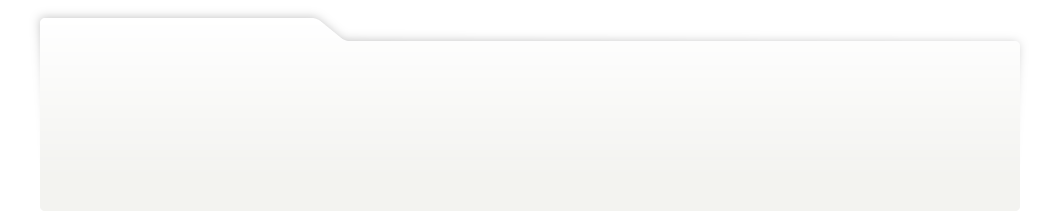
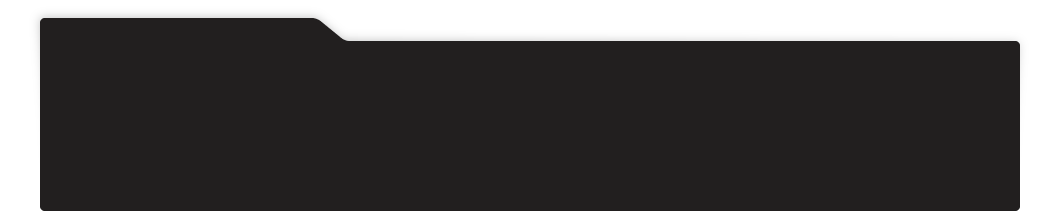
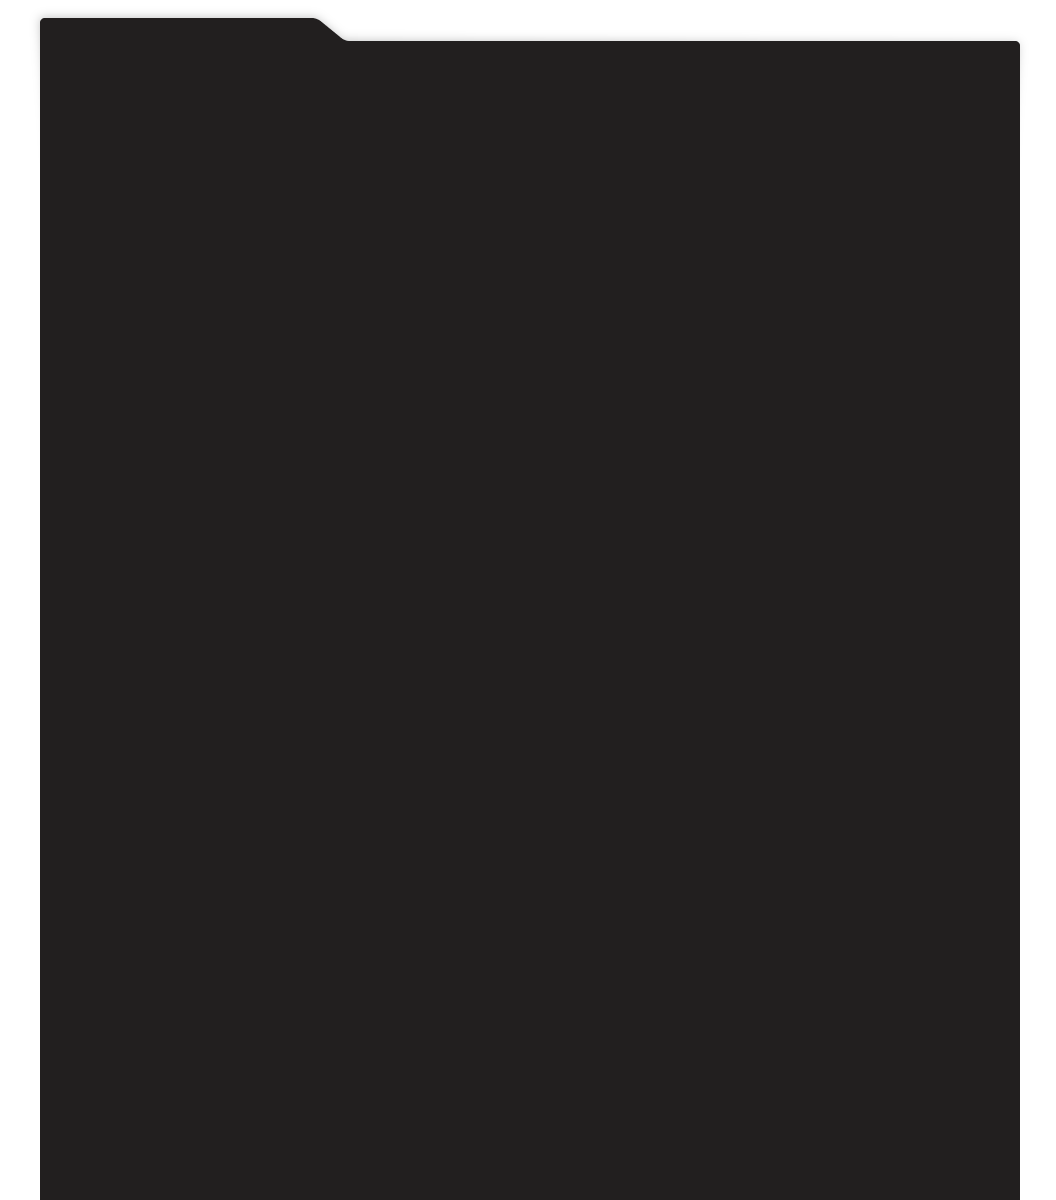
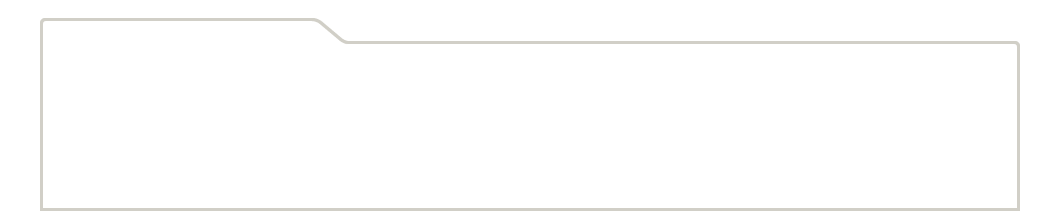
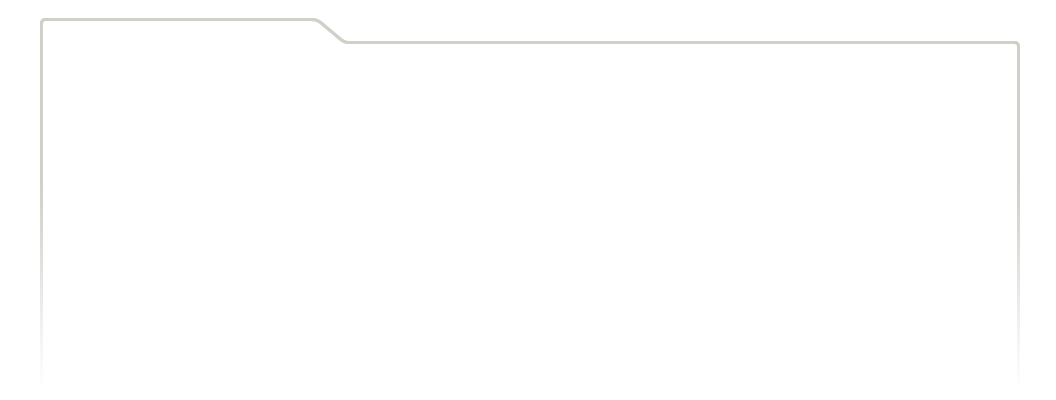
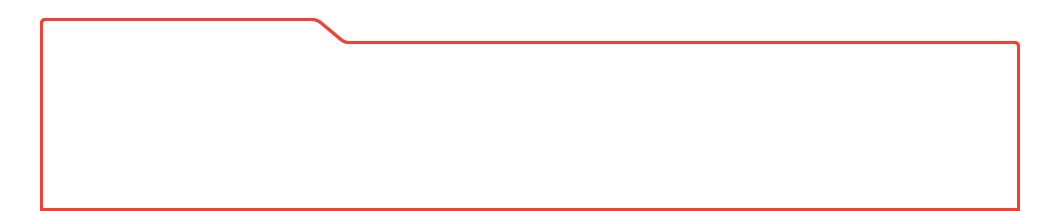
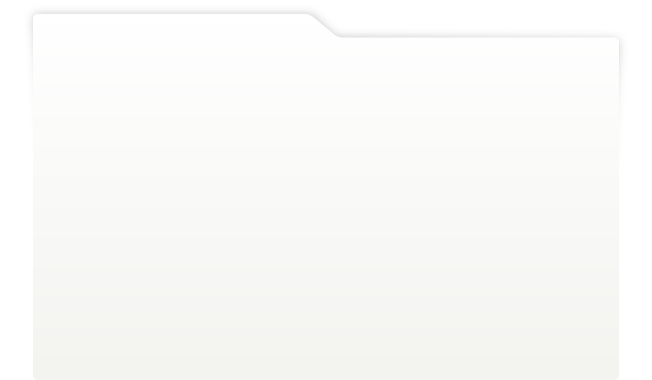
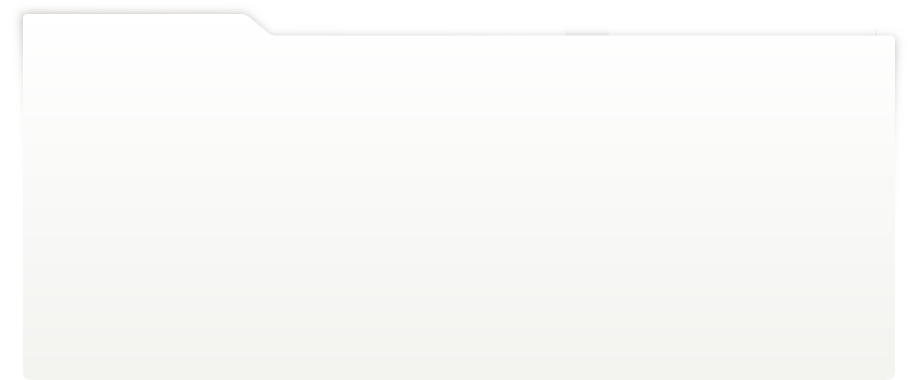
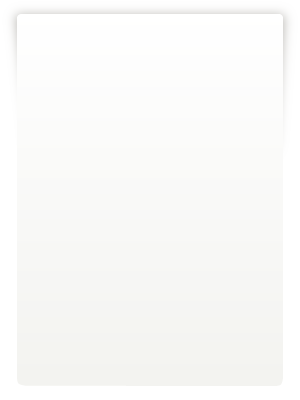
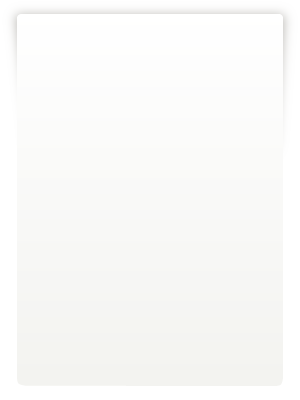
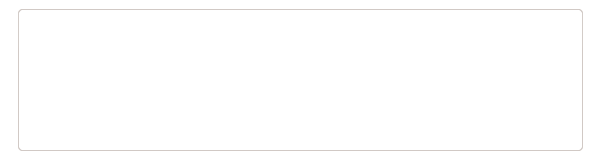
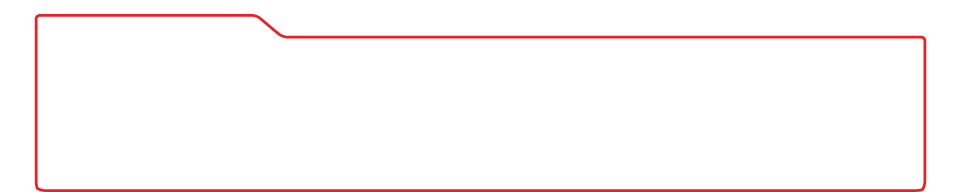
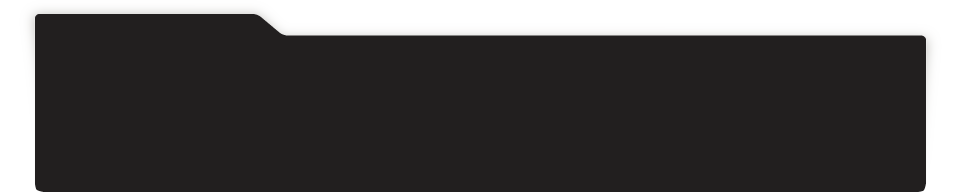
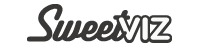
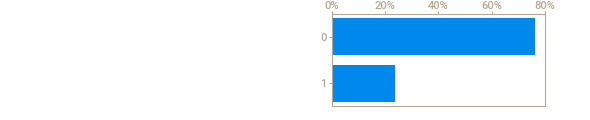
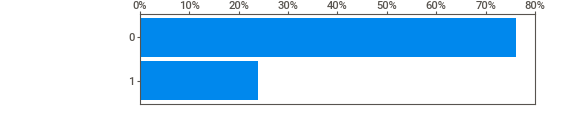
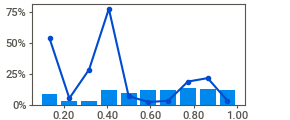
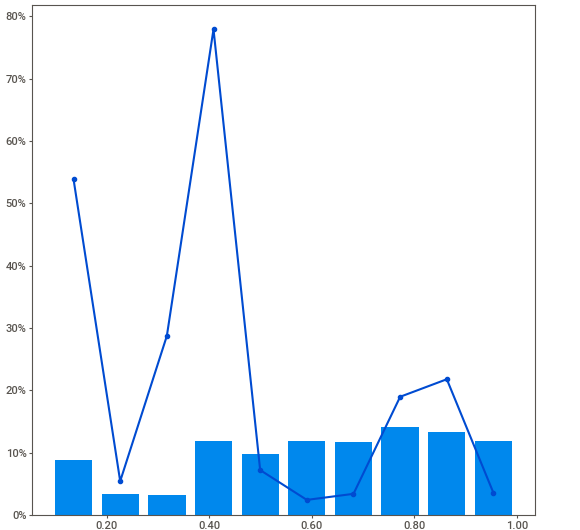
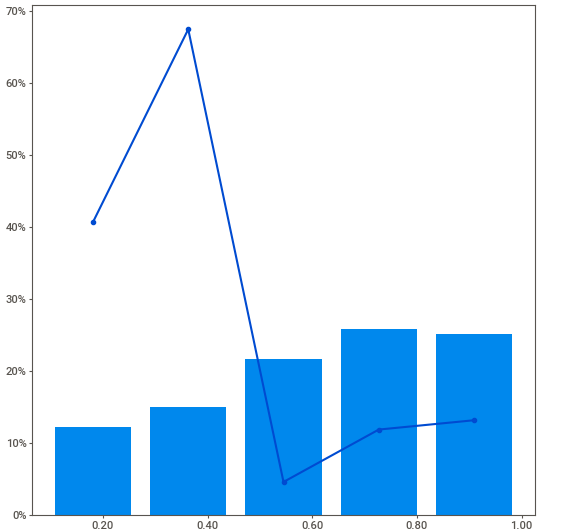
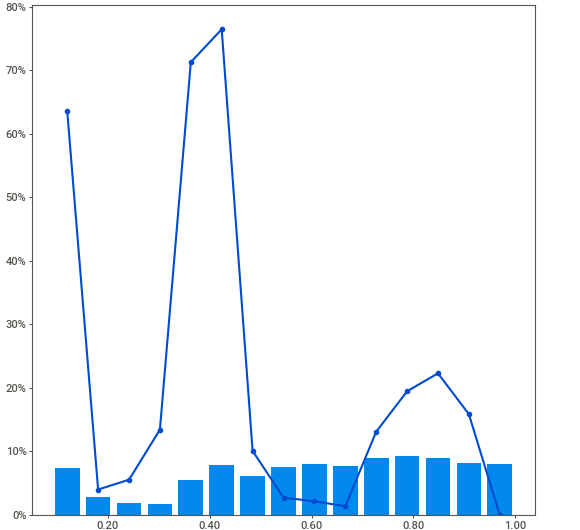
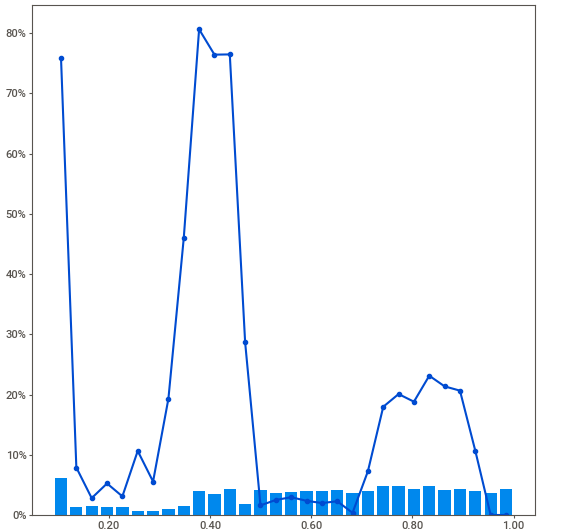
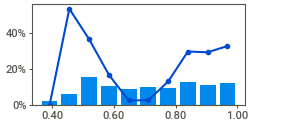
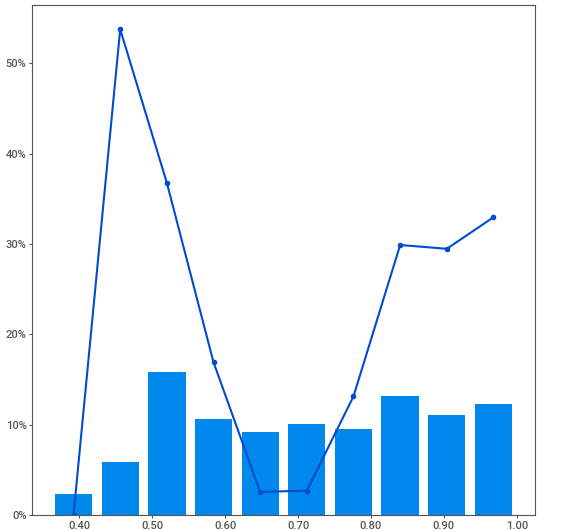
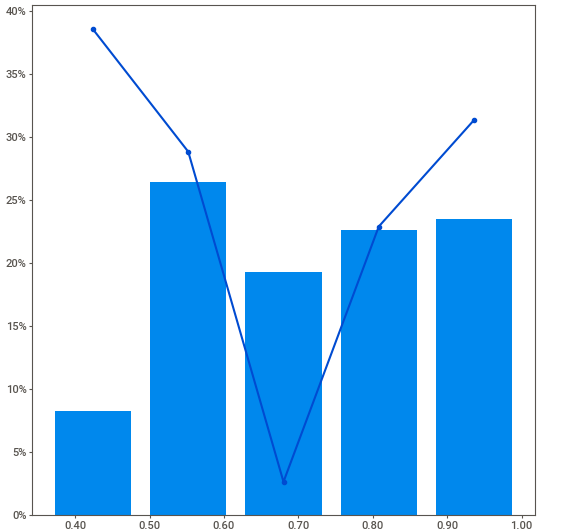
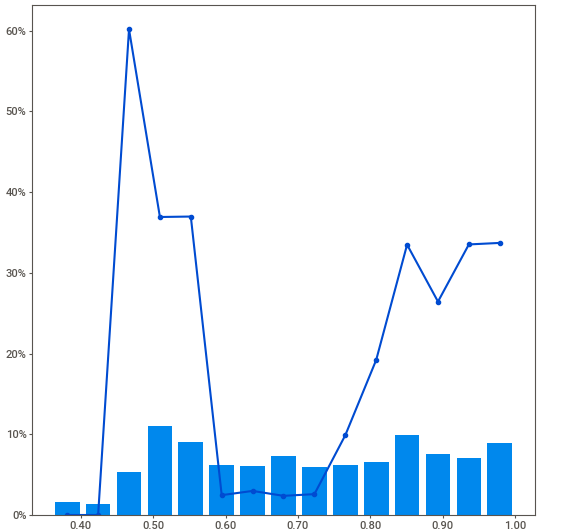
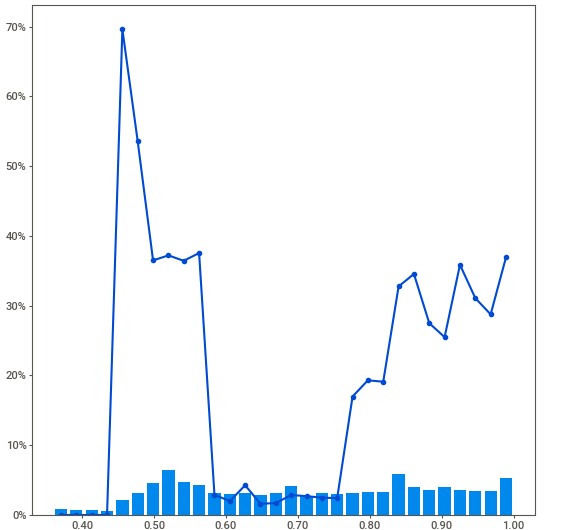
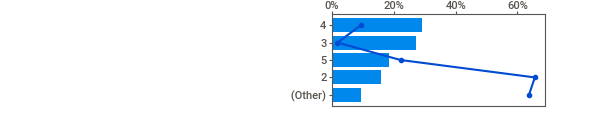
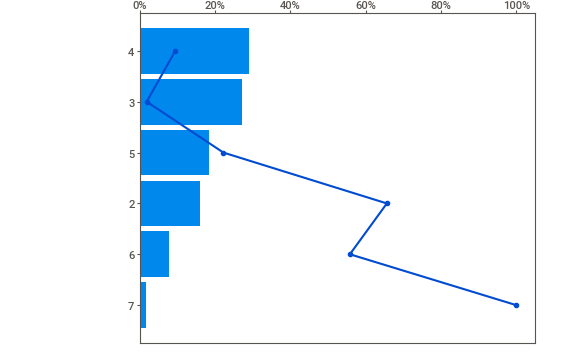
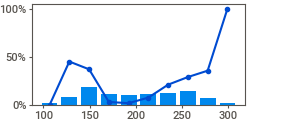
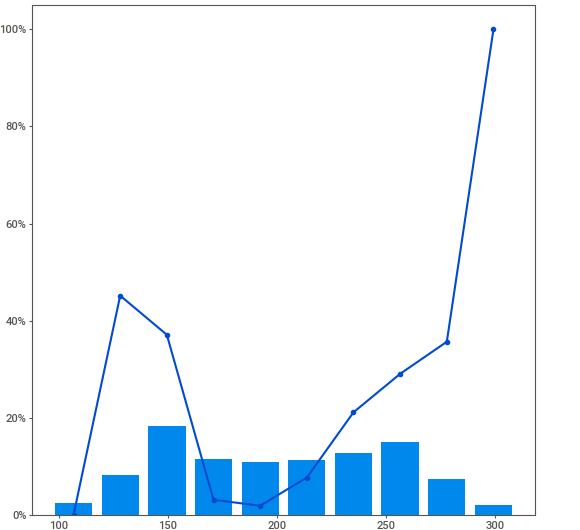
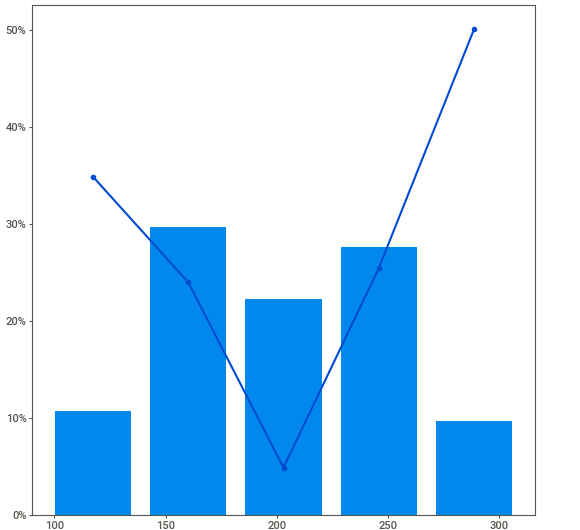
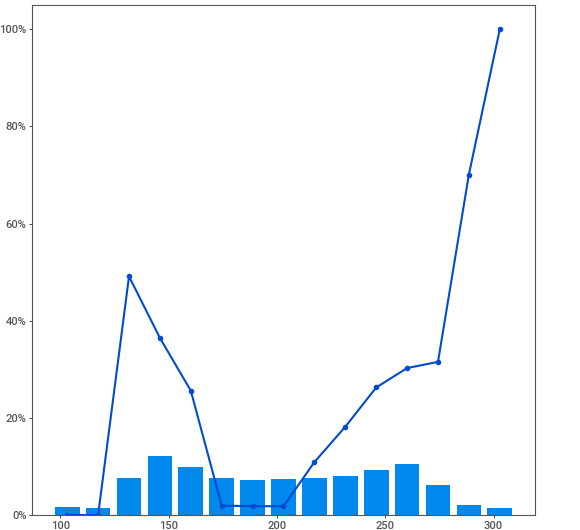
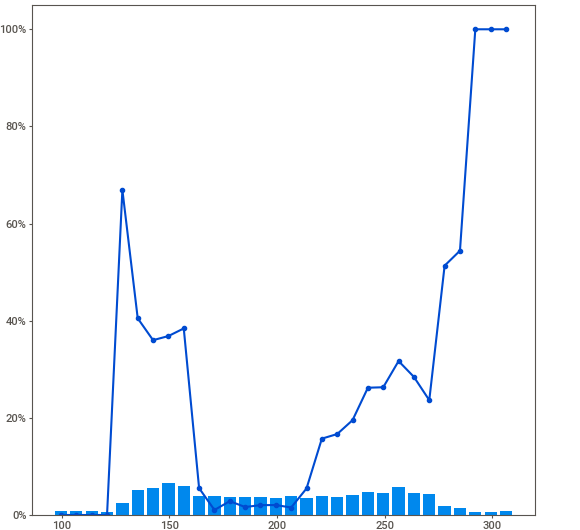
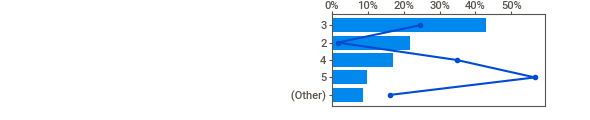
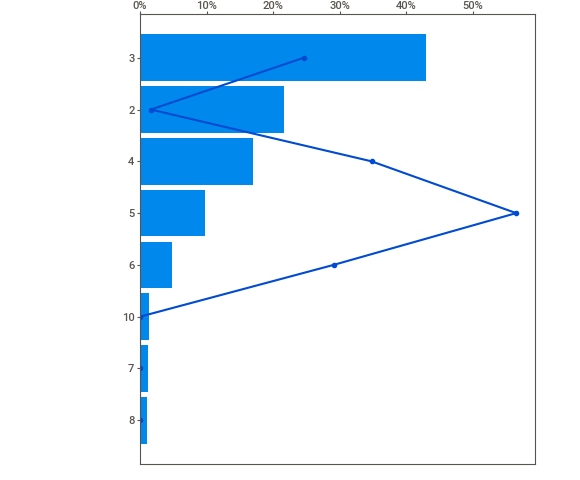
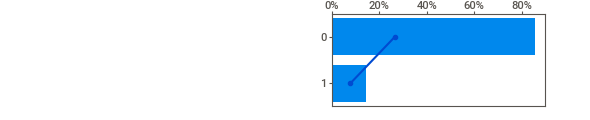
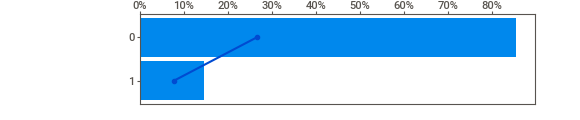
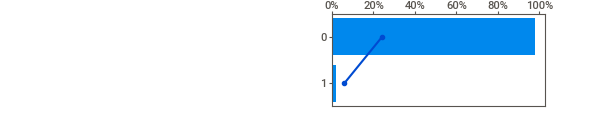
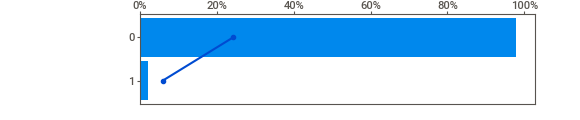
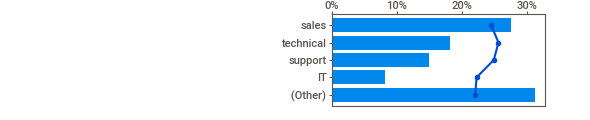
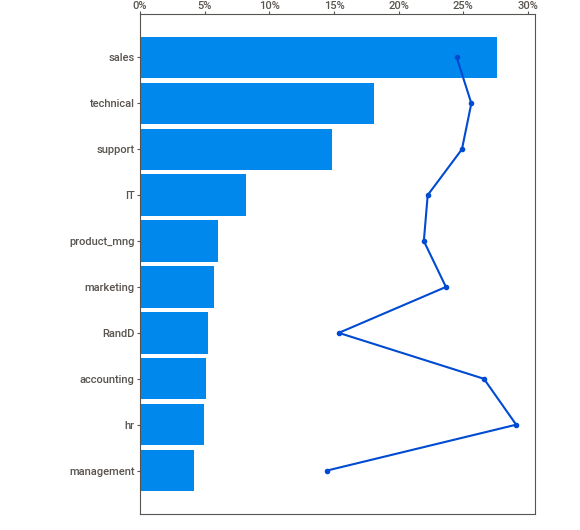
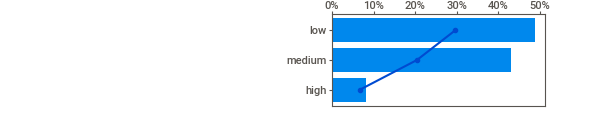
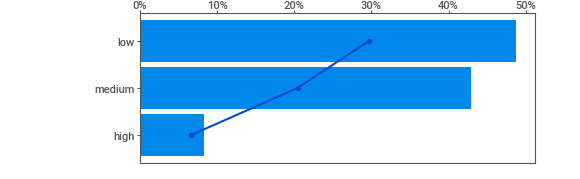
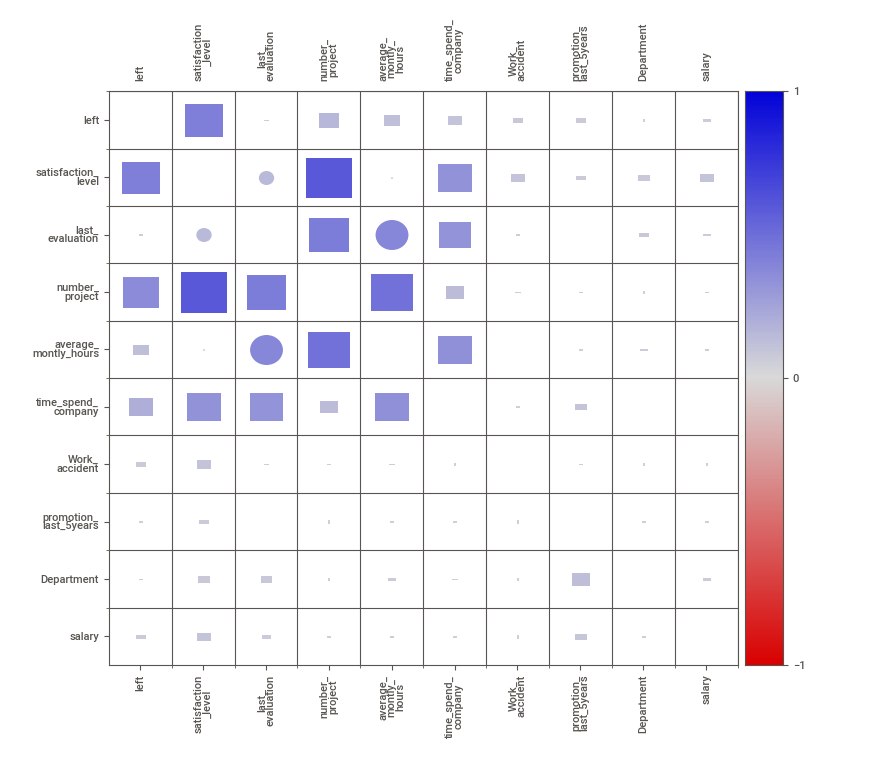
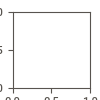

In [ ]:
import sweetviz as sv
my_report = sv.analyze(df,target_feat='left')
my_report.show_notebook(w='100%')

**Insights:**

- There are no missing values in any of the columns. This is an important insight, since it tells us that we do not need to perform any imputation during our preprocessing steps. It is also important for deciding which columns we want to keep while creating a ML model since missing data can have a signficant impact on the model's performance.

- For each numerical column, we can see various summary statistics like range, standard deviation, median, average and skewness, etc. This allows us to get a sense the data in these columns. This may be very helpful in cases where we are performing regression where some columns need to be transformed for effective modelling.

- For each column, we can also see the distribution of data represented using histograms with additional information about the target feature embedded in it. Visualizations like these help us in making a tangible narrative and asking questions that might reveal something important. For example, the plot for the  average_monthly_hours column shows us that people working the longest hours have the highest percentage of leaving. This might raise questions about the work environent and also the reward system within the company.

- Finally, we can also see the associations/correlations between the features in our dataset. This will help us in removing the redundant features from our dataset when we are creating our ML model. This also helps us in creating a better picture of what is really happening. For instance, number_project is highly correlated with satisfication_level. So, people who are getting more projects to work on are suprisingly less satisfied with their jobs. 

### Pandas profiling

Pandas profiling is an extension of the describe function in pandas. This library allows us to conduct some quick data analysis on a pandas dataframe. It is very useful for an initial investigation into the mysteries of our dataset.

Let's see what we can do with it.

In [8]:
from pandas_profiling import ProfileReport
ireport = ProfileReport(df,explorative=True)
ireport.to_notebook_iframe()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Insights:**


*   Pandas profiling gives a lot of information about each column in our dataset. It also tells us how many zero, negative and infinite values are present in each numerical column. This allows us to think about the preprocessing steps with much more clarity. For instance, negative values in a column can be sign of data corruption. It could also be the case that negative values have a specific meaning in our dataset. 

* On toggling the details of a column, we can see more information like the common and extreme values in a column. Extreme values can be particularly problematic since they can be outliers which make modelling difficult. We might want to remove these outliers so that our ML model can learn and perform better.

* We can also see the duplicate rows in our data. Duplicate rows can mean a lot of things. Depending on the scenario and how they affect the quality of our analysis we might decide to remove them or keep them. For instance in our example, the duplicate rows represent the employees who have left the company. Since our dataset is imbalanced, these duplicate rows might be an attempt of oversampling in order to improve the balance and create an effective model.

We have seen some of the insights we can gather using Pandas Profiling. Now, let's look at a more visual approach to EDA. SweetViz and Pandas profiling give us a lot of numbers to think about, but Autoviz gives us only visualizations to understand our data.  

### AutoViz

In his book “Good Charts,” Scott Berinato exclaims: “ A good visualization can communicate the nature and potential impact of information and ideas more powerfully than any other form of communication.” 

AutoViz gives us a lot of different visualizations that can be useful in understanding and communicating the story behind our data. This can be tremendously useful when your audience comprises of people from a non-technical background who don't understand numbers but like pictures. 

Let's use some Autoviz.

Shape of your Data Set: (14999, 10)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    9 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification VISUALIZATION Started #####################
Data Set Shape: 14999 rows, 10 cols
Data Set columns info:
* satisfaction_level: 0 nulls, 92 unique vals, most common: {0.1: 358, 0.11: 335}
* last_eva

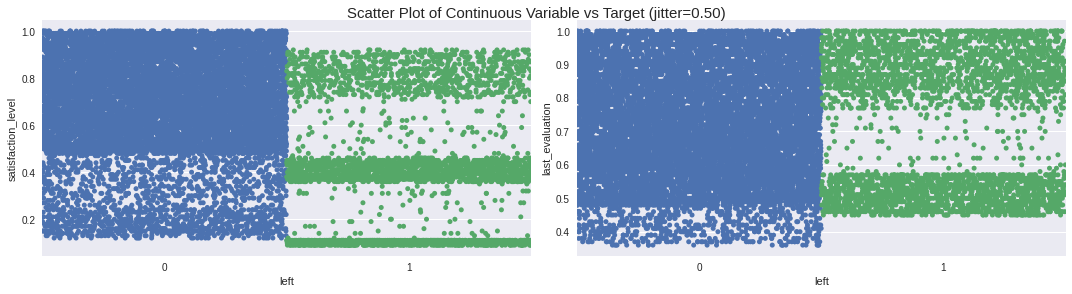

Total Number of Scatter Plots = 3


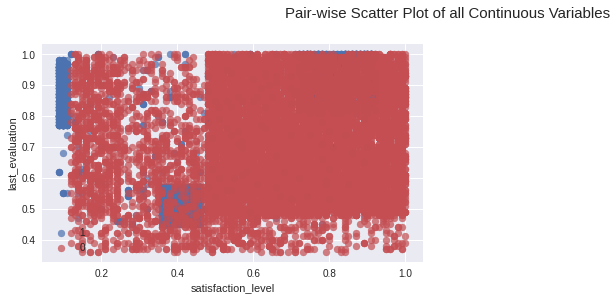

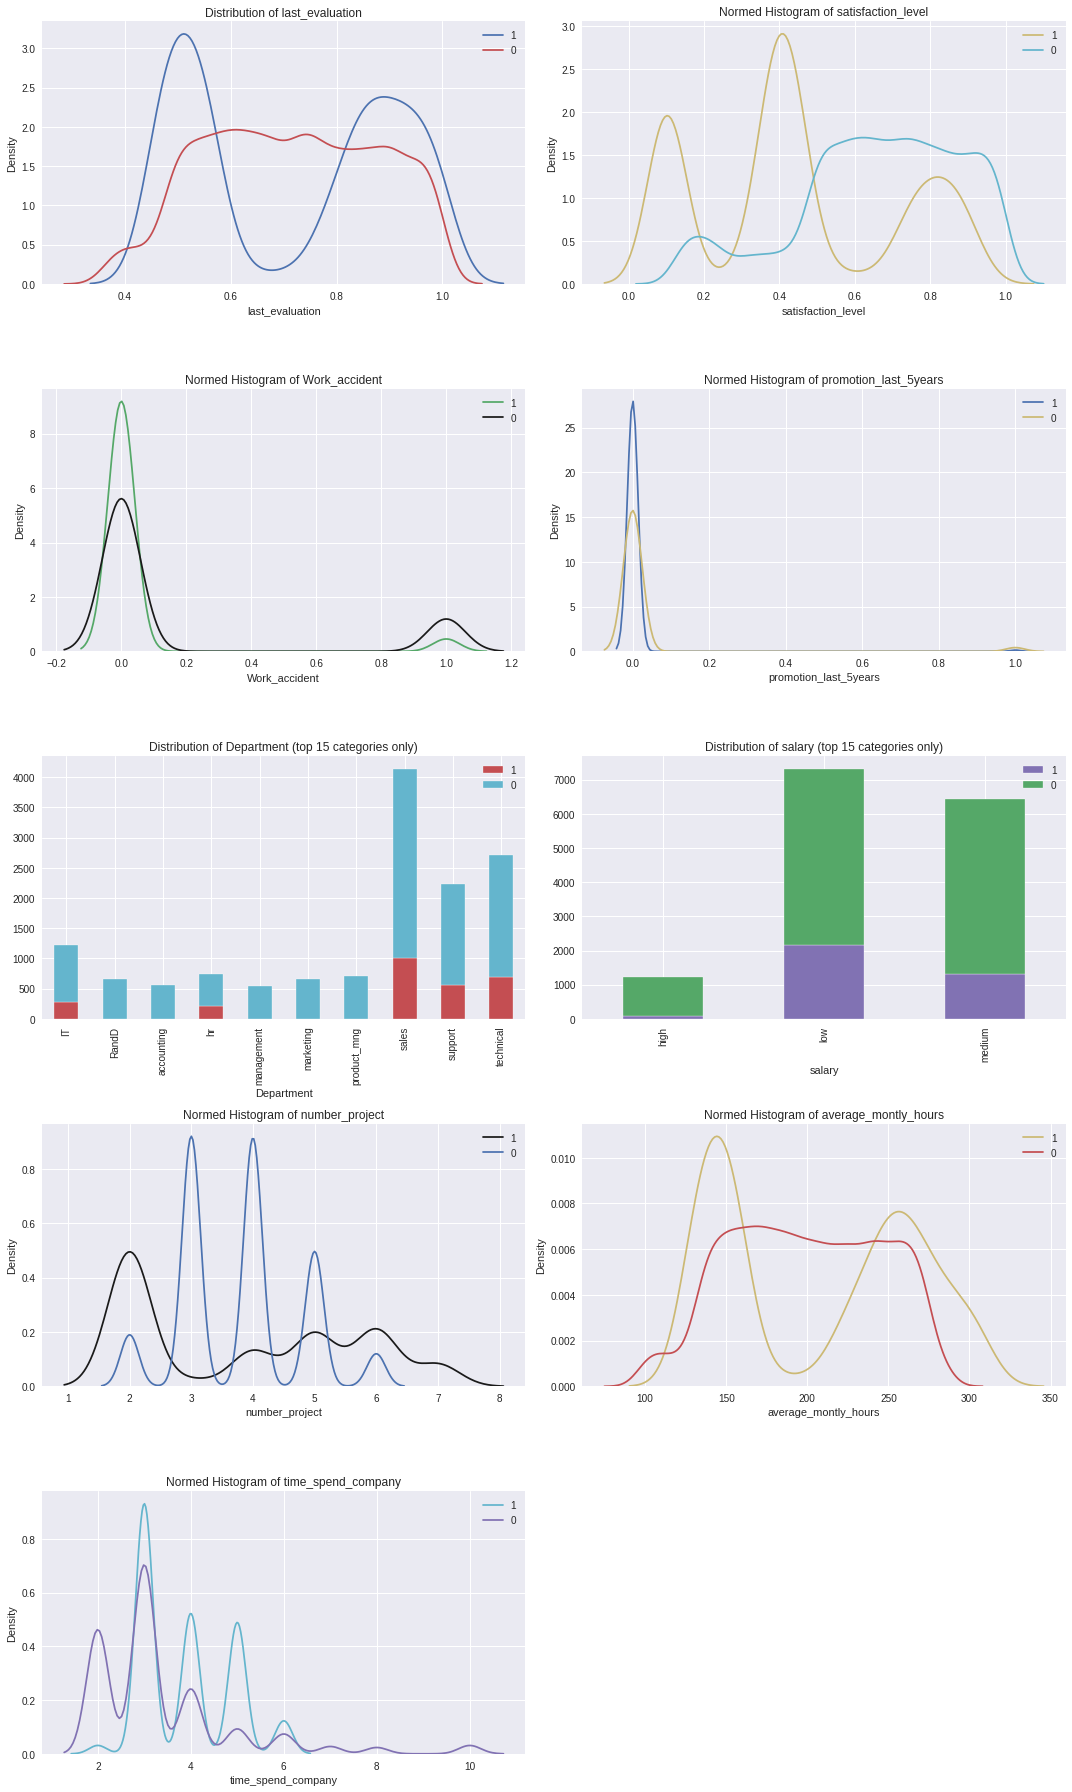

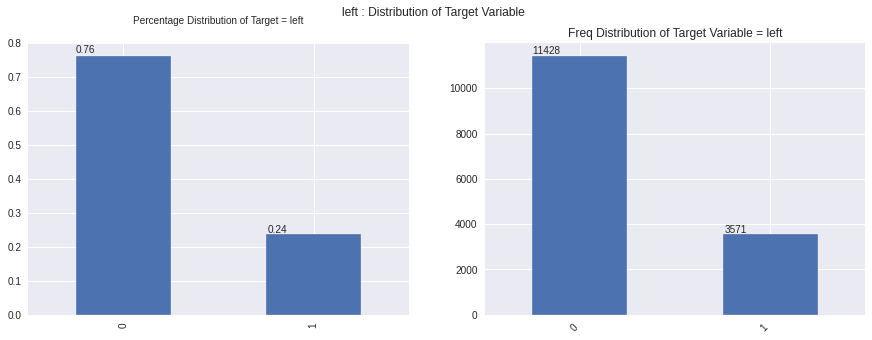

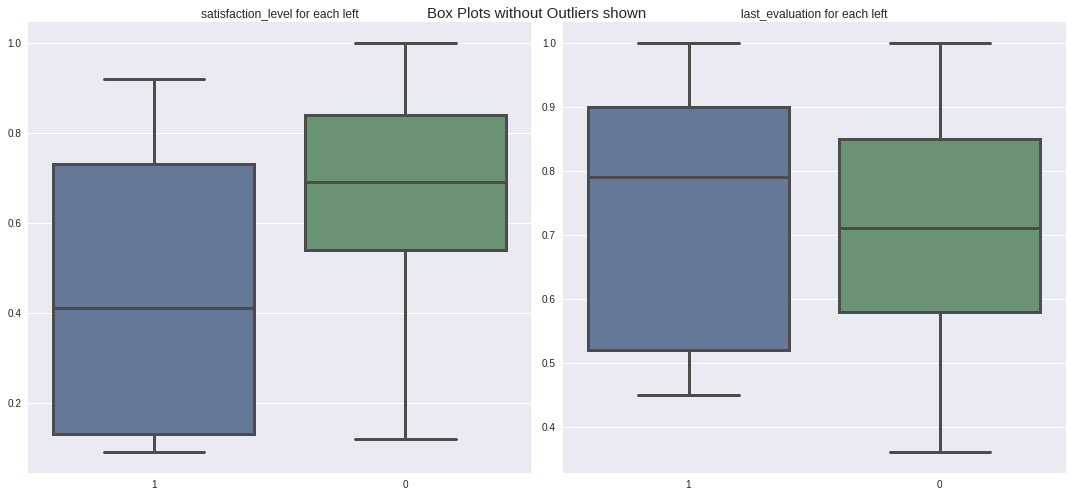

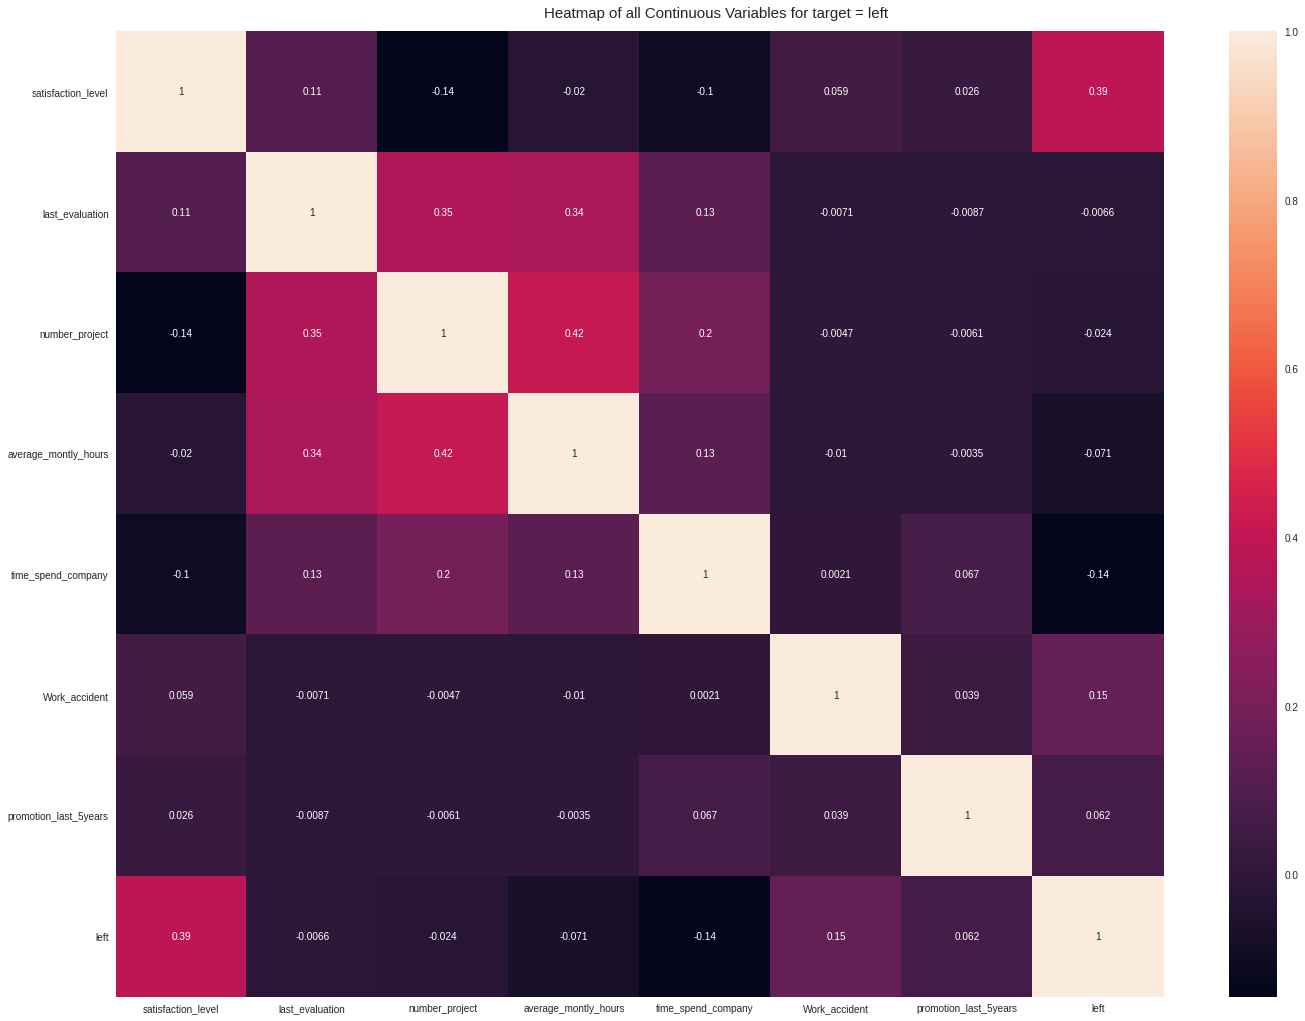

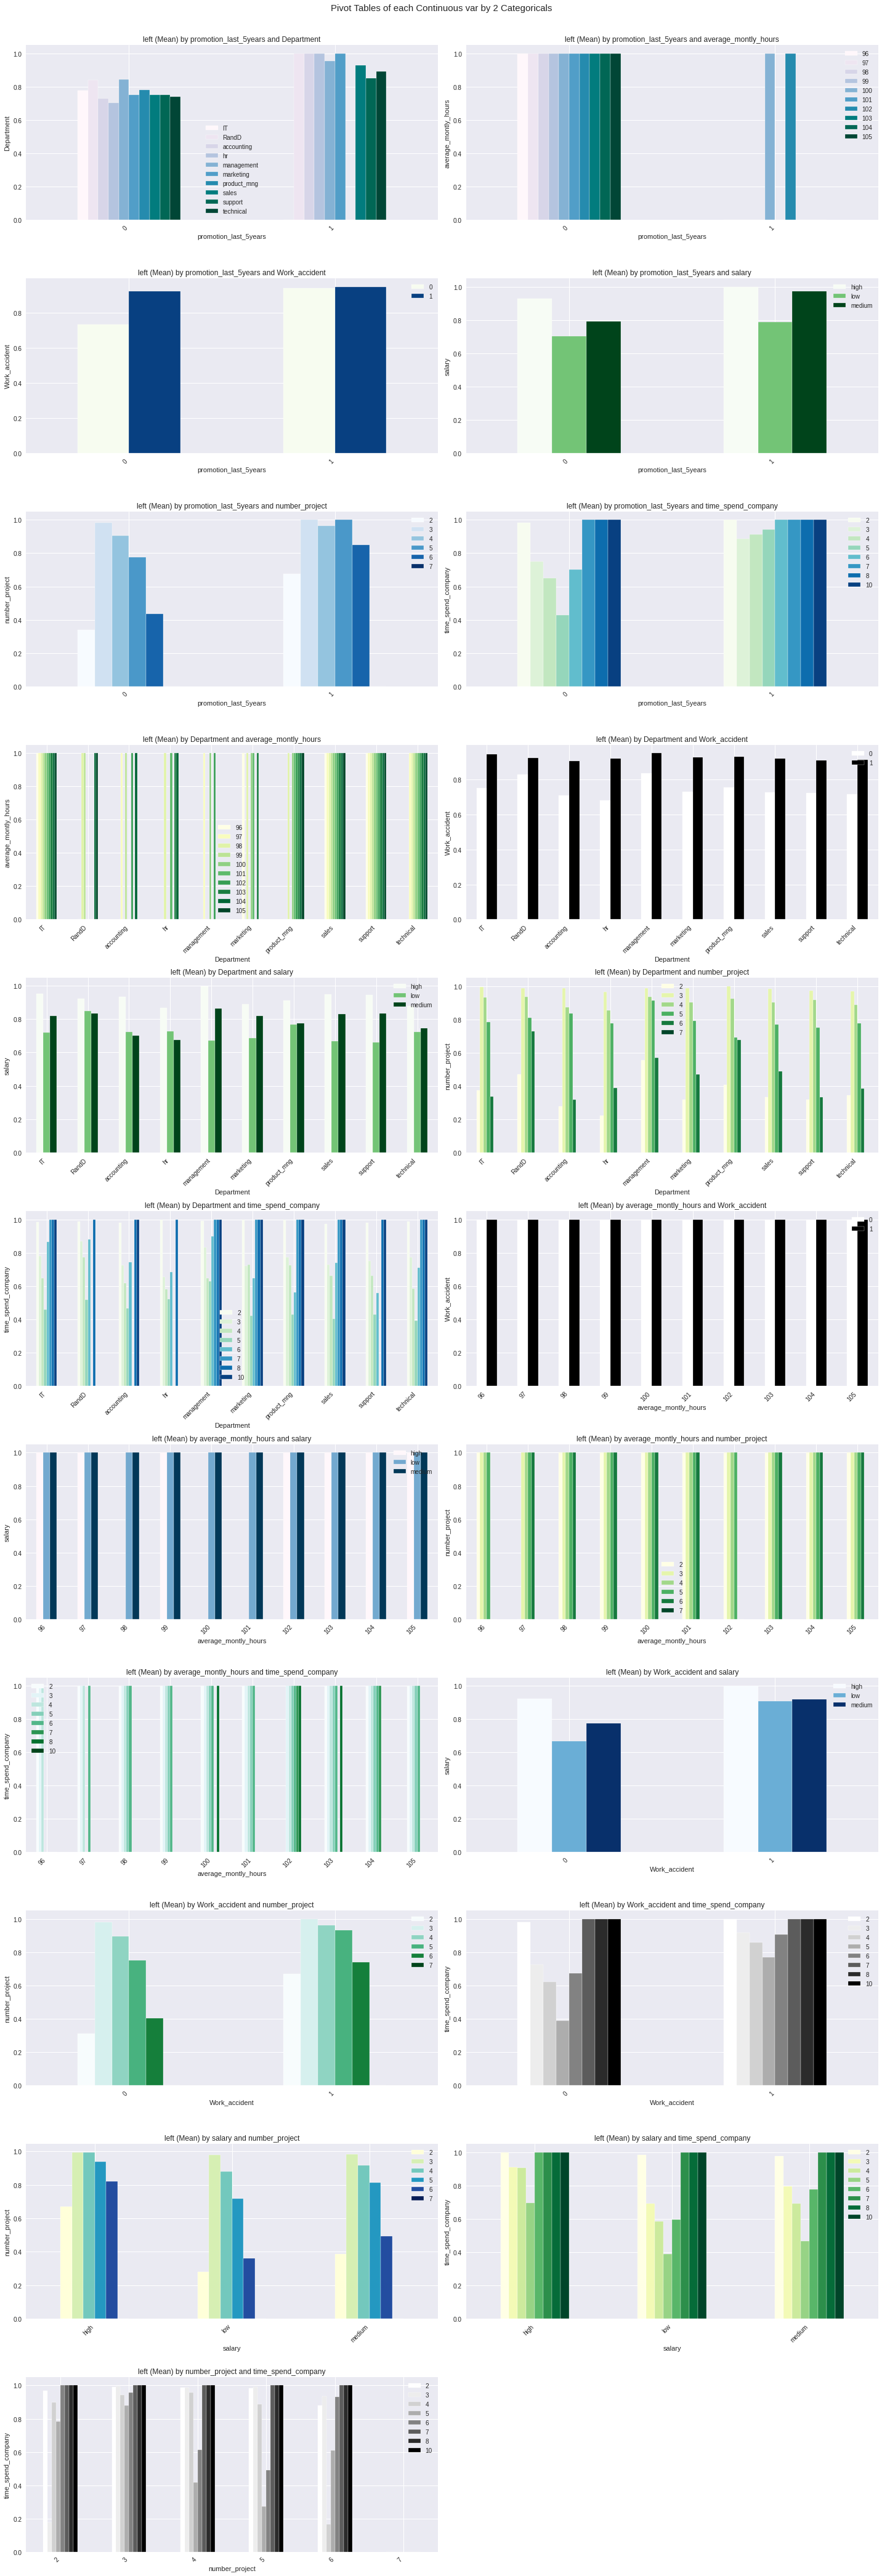

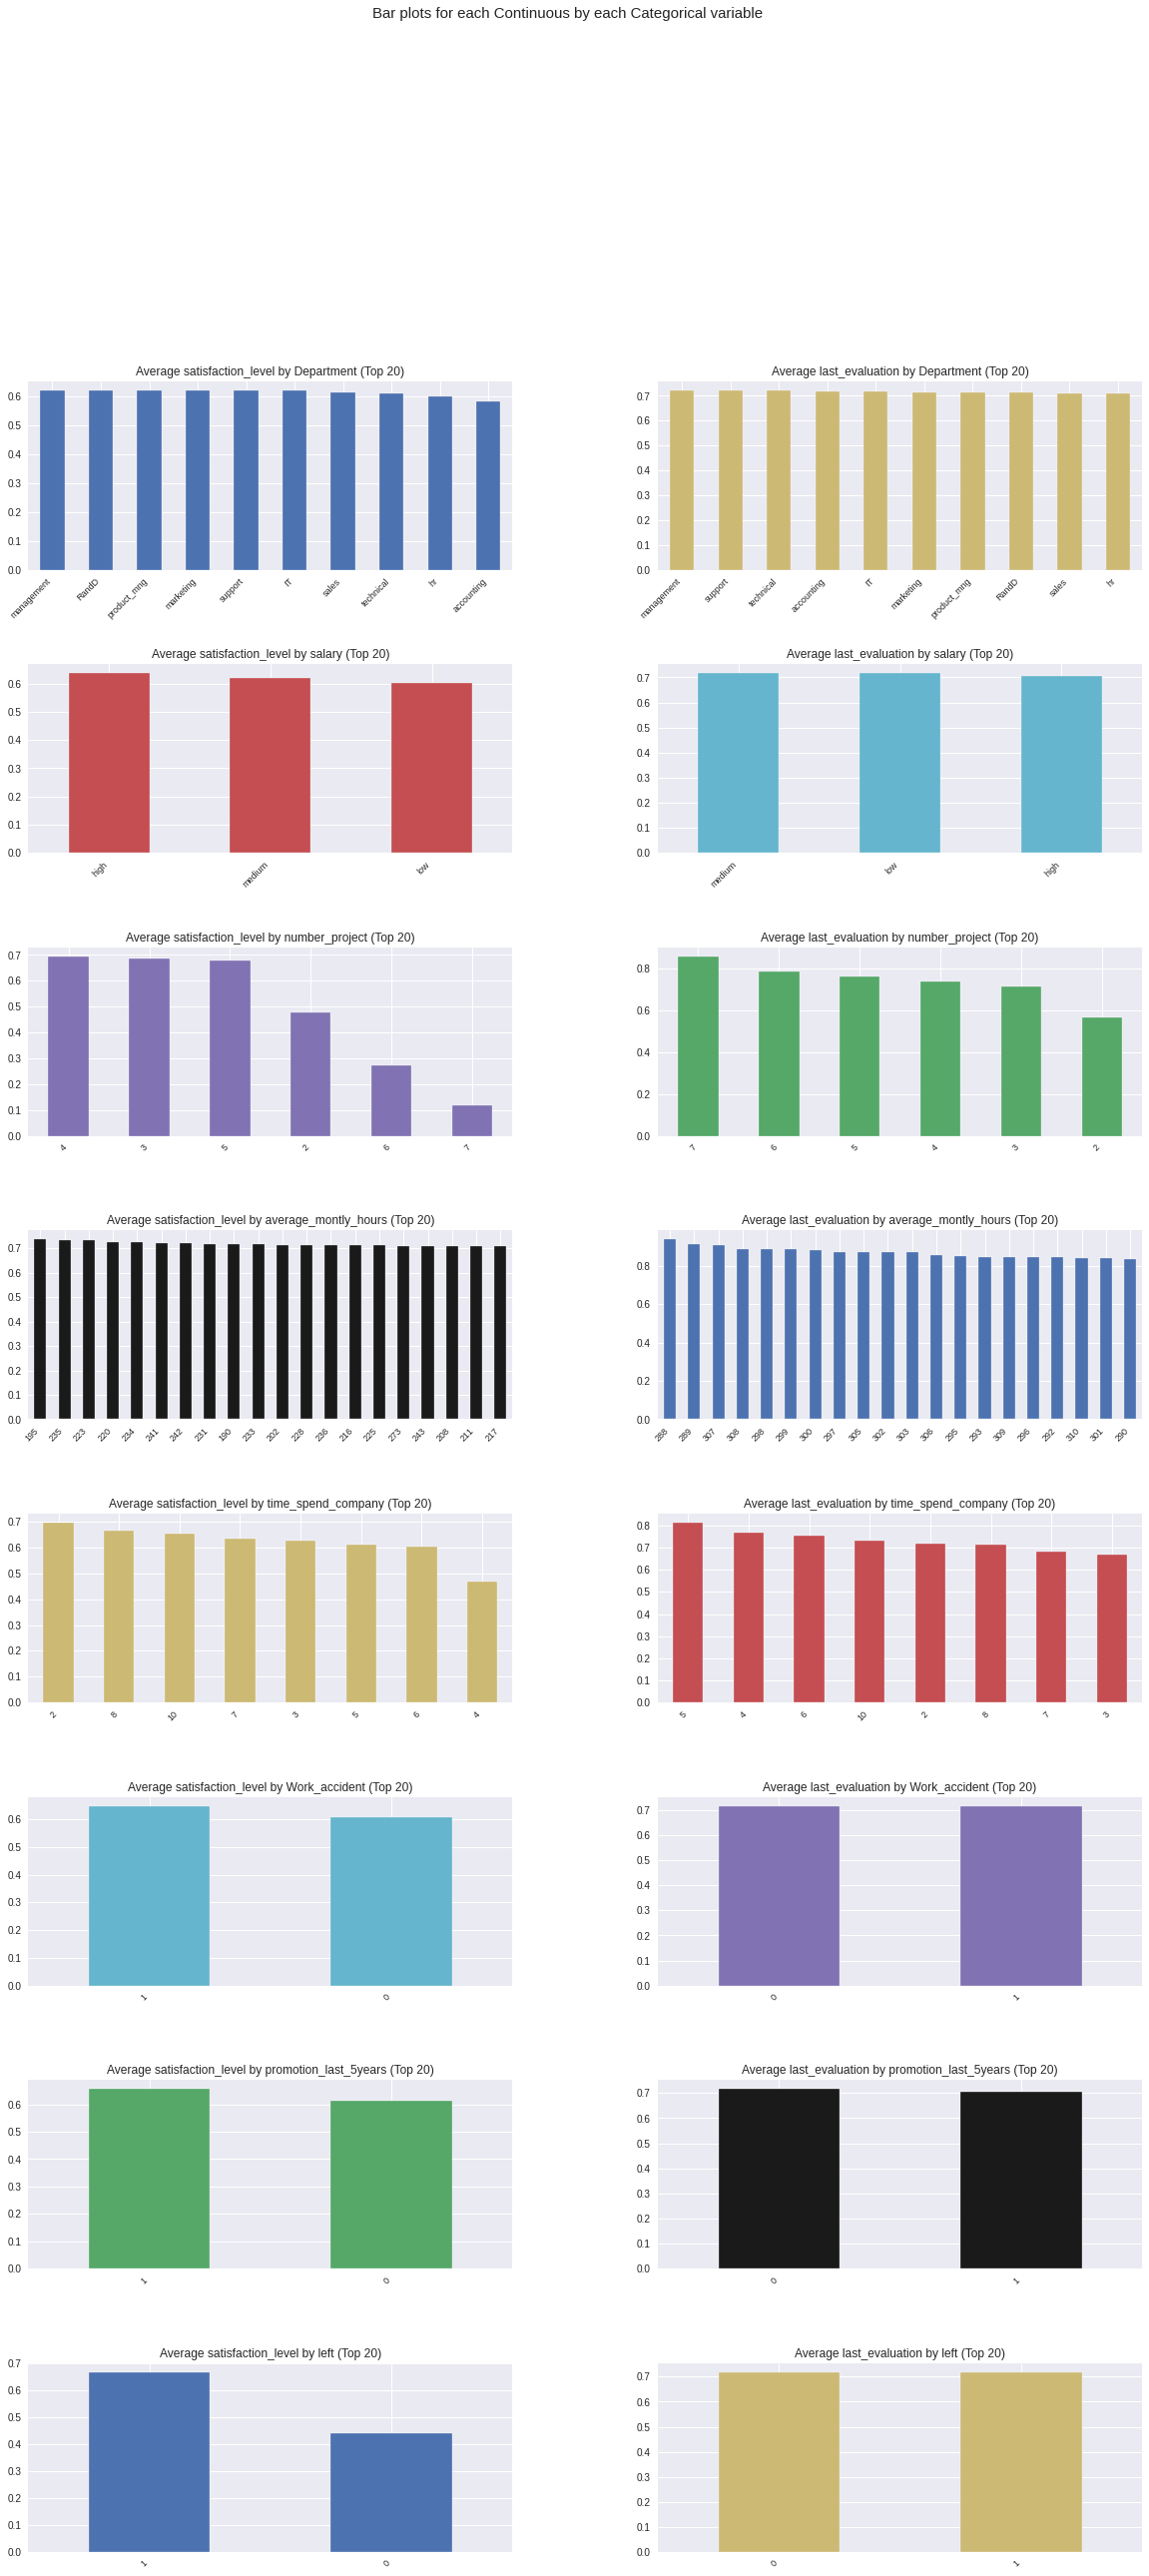

Time to run AutoViz (in seconds) = 22.712

 ###################### VISUALIZATION Completed ########################


In [10]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
sep = ','
dft = AV.AutoViz(filename="",
                 sep=sep,
                 depVar='left',
                 dfte=df, header=0, verbose=1, 
                 lowess=True, chart_format='jpg',
                 max_rows_analyzed=150000, max_cols_analyzed=30)

**Insights:**

* Scatter Plots are an important part of EDA. They show us how our data is spread in the 2D/3D plane where the dimensions represent the features from our dataset. From above, we can see how satisfaction level for employees who have left the company differ from the employees who are still working in the company.

* Visualizing the distribution of each feature based on the value of the target variable can also help in spotting important differences. For example, the normed histogram for average_monthly_hours for the people who left the company is very different from the people still working in the company.

* Autoviz also gives us other useful plots like bar charts, correlation heatmap and box plots to understand the patterns hidden in our data. In our example, the bar chart of average satisfaction_level by number_project shows us that people who have worked on the most number of projects (7) have the lowest satisfaction level. On ther other hand, they have the highest average evaluation scores.  

Now that we have explored all the three Auto-EDA tools, let's talk about their utility and limitations.

## Conclusion

EDA lets us understand our data and develop a deeper understanding about the real world. In the previous sections, we have looked at different Auto-EDA tools and noted some insights that can they provide us. Although, these tools are tremendously useful, they have their limitations. 

Firstly, all the EDA tools we have seen above work very well on tabular datasets, but they aren't useful for datasets from other domains like computer vision, NLP, etc. 

Secondly, they don't always give us the best information and plots. Autoviz uses some internal heuristics to decide which plots are the most useful, but it is still not clear if these heuristics always work. It is still very hard to answer the question: What information is the most useful for a data scientist?

Finally, it's very difficult to configure these tools in a way that is best suited for your data. They are not very flexible. Although, we can customize them to some degree, our problems will always have specific requirements. 

In conclusion, Auto-EDA is very useful to launch an initial investigation into the data. It gives us the basic information necessary to delve deeper into the data and ask more interesting questions. More importantly, it gives us a way of conducting quick data analysis with much less manual effort.

I hope to see more such tools that will help data scientists tell better stories through their data.


See you on the next adventure!!!